<a href="https://colab.research.google.com/github/sofiaborgato/Bioinformatic_project/blob/main/Data/CNN_gene.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone 'https://github.com/sofiaborgato/Bioinformatic_project.git'
import tarfile
import os
import sys
import os
import numpy as np
import string
import pandas as pd
import tensorflow as tf
from tensorflow import feature_column
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# open file
file = tarfile.open('./Bioinformatic_project/Data/data_local_concat.tar.xz') 
# extracting file
file.extractall('./')
  
# file.close()
# path='./Bioinformatic_project'
# for file_name in os.listdir(path):
#   print(file_name)


fatal: destination path 'Bioinformatic_project' already exists and is not an empty directory.


# Read data and encode label

In [ ]:
data=pd.read_csv('/content/data_local_concat/local_aligned_.csv')#read the data
data

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()#encode the label
data['label']=le.fit_transform(data['label'])
data.drop(columns='Full sequence',inplace=True)

#Split dataset and load batch size

In [ ]:
def df_to_dataset(dataframe, shuffle=True, batch_size=32):#function to load the dataset as tensorflow data object
  dataframe = dataframe.copy()
  labels = dataframe.pop('label')
  #print(dataframe.head())
  ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
  
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  return ds


from sklearn.model_selection import train_test_split#Train_test_val split
train, test = train_test_split(data, test_size=0.2,shuffle=True,stratify=data['label'])
train, val = train_test_split(train, test_size=0.2,shuffle=True,stratify=train['label'])

In [ ]:
batch_size=32
#define the batch size and load data in a tensor flow data object
train_ds = df_to_dataset(train, shuffle = False, batch_size=batch_size)
val_ds = df_to_dataset(val, shuffle=False, batch_size=batch_size)
test_ds = df_to_dataset(test, shuffle=False, batch_size=batch_size)

indicator_column_names = data.columns.drop('label')




In [ ]:
df_lunghezze=pd.DataFrame(columns=data.columns.drop('label'))#calculate the length of each gene in the dataset
for line in data.values:
  lenght={}
  for i in range(len(data.columns.drop('label'))):
    l=len(line[i])
    lenght[data.columns[i]]=l
   
  df_lunghezze=df_lunghezze.append(lenght,ignore_index=True)

In [ ]:
def demo(feature_column):#demo function to understand the embeddings
  feature_layer = layers.DenseFeatures(feature_column)
  print()
  print(feature_layer(example_batch).numpy())

In [ ]:
gene_len=df_lunghezze.describe().loc[['top']].values.reshape(11,)#define the gene lenght parameters

In [ ]:
embedding_dims=[]#define the tunable embedding dims for each gene by dividing the gene length by a weel defined factor
for i in [1,10,50,100]:
  embedding_dims.append(np.array(gene_len/i,dtype=np.int32))

In [ ]:
#batch_size=[16,32,64,128]
learning_rate=[10e-2,10e-3,10e-4,10e-5]#learning rate for fine tuning 


[21290  3822   828   228   669   186   366   132   366  1260   117]
[2129  382   82   22   66   18   36   13   36  126   11]
[425  76  16   4  13   3   7   2   7  25   2]
[212  38   8   2   6   1   3   1   3  12   1]


Learning_rate:0.001
Dim:21290
Epoch 1/50
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
120/120 - 11s - loss: 1.7542 - accuracy: 0.4456 - val_loss: 1.7563 - val_accuracy: 0.4077
Epoch 2/50
120/120 - 8s - loss: 1.5366 - accuracy: 0.5330 - val_loss: 1.5134 - val_accuracy: 0.6184
Epoch 3/50
120/120 - 8s - loss: 1.6887 - accuracy: 0.5121 - val_loss: 1.7862 - val_accuracy: 0.4807
Epoch 4/50
120/120 - 8s - loss: 1.7883 - accuracy: 0.3770 - val_loss: 1.7918 - val_accuracy: 0.1668
Epoch 5/50
120/120 - 8s - loss: 1.7953 - accuracy: 0.1785 - val_loss: 1.7918 - val_accuracy: 0.1668
Epoch 6/50
120/120 - 8s - loss: 1.7918 - accuracy: 0.1769 - val_loss: 1.7918 - val_accuracy: 0.1668
Epoch 7/50
120/120 - 8s - loss: 1.7918 - accuracy: 0.1816 - val_loss: 1.7918 - val_accuracy: 0.1668
Epoch 8/50
120/120 - 8s - loss: 1.7918 - accuracy: 0.1790 - val_loss: 1.7918 - val_accuracy: 0.1668
Epoc

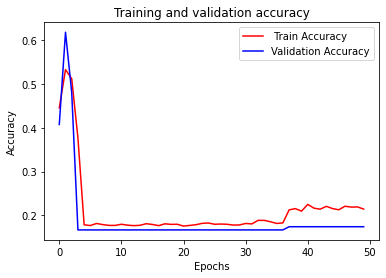

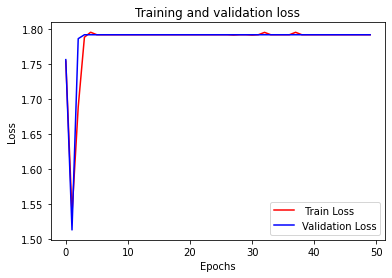

<Figure size 432x288 with 0 Axes>

Learning_rate:0.001
Dim:2129
Epoch 1/50
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
120/120 - 6s - loss: 0.6495 - accuracy: 0.9165 - val_loss: 0.5111 - val_accuracy: 0.9353
Epoch 2/50
120/120 - 2s - loss: 1.1308 - accuracy: 0.8030 - val_loss: 1.2109 - val_accuracy: 0.8822
Epoch 3/50
120/120 - 2s - loss: 1.1169 - accuracy: 0.8372 - val_loss: 0.9646 - val_accuracy: 0.8540
Epoch 4/50
120/120 - 2s - loss: 1.0756 - accuracy: 0.8093 - val_loss: 1.1922 - val_accuracy: 0.8863
Epoch 5/50
120/120 - 2s - loss: 1.2547 - accuracy: 0.8362 - val_loss: 1.3765 - val_accuracy: 0.8916
Epoch 6/50
120/120 - 2s - loss: 1.2572 - accuracy: 0.8236 - val_loss: 1.2612 - val_accuracy: 0.8926
Epoch 7/50
120/120 - 2s - loss: 1.1758 - accuracy: 0.8380 - val_loss: 1.2593 - val_accuracy: 0.9114
Epoch 8/50
120/120 - 2s - loss: 1.1947 - accuracy: 0.8531 - val_loss: 1.2686 - val_accuracy: 0.9176
Epoch 

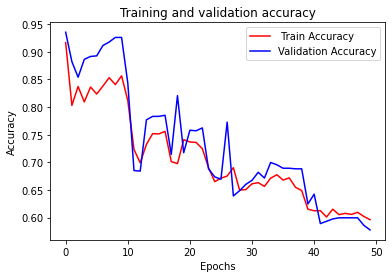

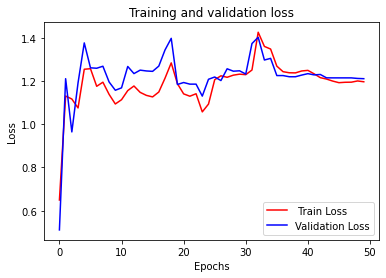

<Figure size 432x288 with 0 Axes>

Learning_rate:0.001
Dim:425
Epoch 1/50
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
120/120 - 5s - loss: 1.5573 - accuracy: 0.4114 - val_loss: 0.9335 - val_accuracy: 0.6538
Epoch 2/50
120/120 - 2s - loss: 0.9414 - accuracy: 0.6509 - val_loss: 0.8283 - val_accuracy: 0.6653
Epoch 3/50
120/120 - 2s - loss: 0.7674 - accuracy: 0.6569 - val_loss: 0.7710 - val_accuracy: 0.6621
Epoch 4/50
120/120 - 2s - loss: 0.7638 - accuracy: 0.7091 - val_loss: 0.6398 - val_accuracy: 0.7894
Epoch 5/50
120/120 - 2s - loss: 0.8793 - accuracy: 0.7467 - val_loss: 0.7003 - val_accuracy: 0.7852
Epoch 6/50
120/120 - 2s - loss: 0.7892 - accuracy: 0.7540 - val_loss: 0.6097 - val_accuracy: 0.8102
Epoch 7/50
120/120 - 2s - loss: 0.7979 - accuracy: 0.7454 - val_loss: 0.6203 - val_accuracy: 0.7862
Epoch 8/50
120/120 - 2s - loss: 0.7636 - accuracy: 0.6885 - val_loss: 0.9078 - val_accuracy: 0.6455
Epoch 9

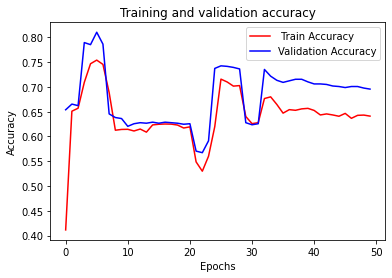

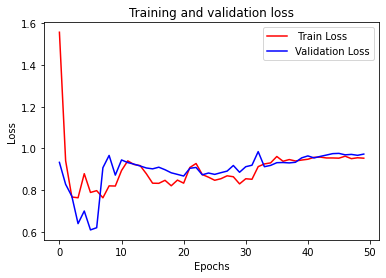

<Figure size 432x288 with 0 Axes>

Learning_rate:0.001
Dim:212
Epoch 1/50
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
120/120 - 6s - loss: 2.0134 - accuracy: 0.2278 - val_loss: 1.8255 - val_accuracy: 0.3139
Epoch 2/50
120/120 - 2s - loss: 4.2805 - accuracy: 0.2387 - val_loss: 3.5239 - val_accuracy: 0.3003
Epoch 3/50
120/120 - 2s - loss: 3.5544 - accuracy: 0.2990 - val_loss: 3.3841 - val_accuracy: 0.3107
Epoch 4/50
120/120 - 2s - loss: 3.4004 - accuracy: 0.3039 - val_loss: 3.2927 - val_accuracy: 0.3191
Epoch 5/50
120/120 - 2s - loss: 3.1489 - accuracy: 0.3076 - val_loss: 2.2065 - val_accuracy: 0.3399
Epoch 6/50
120/120 - 2s - loss: 1.6029 - accuracy: 0.3486 - val_loss: 2.0457 - val_accuracy: 0.3149
Epoch 7/50
120/120 - 2s - loss: 1.5989 - accuracy: 0.3650 - val_loss: 2.0559 - val_accuracy: 0.3264
Epoch 8/50
120/120 - 2s - loss: 1.6275 - accuracy: 0.3412 - val_loss: 2.0034 - val_accuracy: 0.3139
Epoch 9

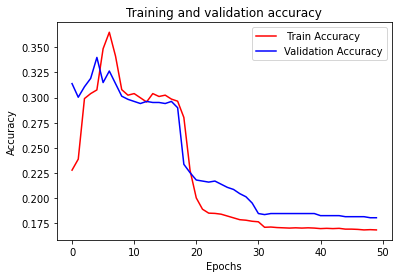

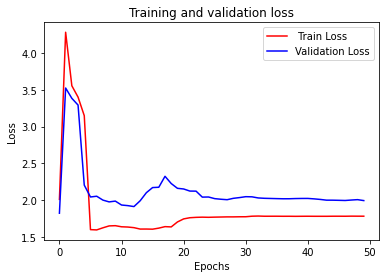

<Figure size 432x288 with 0 Axes>

Learning_rate:0.0001
Dim:21290
Epoch 1/50
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
120/120 - 11s - loss: 0.9284 - accuracy: 0.8054 - val_loss: 0.7207 - val_accuracy: 0.8279
Epoch 2/50
120/120 - 8s - loss: 0.5944 - accuracy: 0.8356 - val_loss: 0.5302 - val_accuracy: 0.8279
Epoch 3/50
120/120 - 8s - loss: 0.7883 - accuracy: 0.6979 - val_loss: 0.9019 - val_accuracy: 0.6403
Epoch 4/50
120/120 - 8s - loss: 1.4682 - accuracy: 0.6134 - val_loss: 1.6658 - val_accuracy: 0.6444
Epoch 5/50
120/120 - 8s - loss: 1.3798 - accuracy: 0.5763 - val_loss: 1.0503 - val_accuracy: 0.6997
Epoch 6/50
120/120 - 8s - loss: 1.0235 - accuracy: 0.7175 - val_loss: 1.0332 - val_accuracy: 0.7341
Epoch 7/50
120/120 - 8s - loss: 0.9957 - accuracy: 0.7237 - val_loss: 1.0220 - val_accuracy: 0.7341
Epoch 8/50
120/120 - 8s - loss: 0.9827 - accuracy: 0.7227 - val_loss: 1.0220 - val_accuracy: 0.7362
Epo

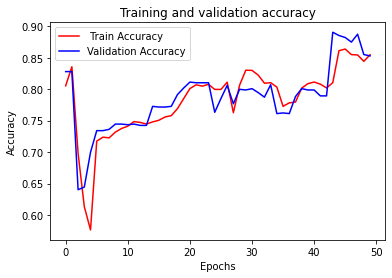

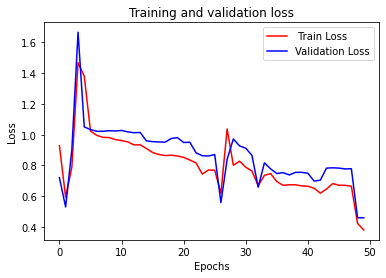

<Figure size 432x288 with 0 Axes>

Learning_rate:0.0001
Dim:2129
Epoch 1/50
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
120/120 - 6s - loss: 1.2441 - accuracy: 0.7662 - val_loss: 0.3300 - val_accuracy: 0.9489
Epoch 2/50
120/120 - 2s - loss: 0.3009 - accuracy: 0.9549 - val_loss: 0.2850 - val_accuracy: 0.9677
Epoch 3/50
120/120 - 2s - loss: 0.2176 - accuracy: 0.9723 - val_loss: 0.2249 - val_accuracy: 0.9708
Epoch 4/50
120/120 - 2s - loss: 0.1783 - accuracy: 0.9763 - val_loss: 0.2473 - val_accuracy: 0.9729
Epoch 5/50
120/120 - 2s - loss: 0.1557 - accuracy: 0.9797 - val_loss: 0.2635 - val_accuracy: 0.9729
Epoch 6/50
120/120 - 2s - loss: 0.8520 - accuracy: 0.8484 - val_loss: 0.7429 - val_accuracy: 0.8780
Epoch 7/50
120/120 - 2s - loss: 0.7625 - accuracy: 0.8795 - val_loss: 0.6523 - val_accuracy: 0.9041
Epoch 8/50
120/120 - 2s - loss: 0.6805 - accuracy: 0.9118 - val_loss: 0.5715 - val_accuracy: 0.9437
Epoch

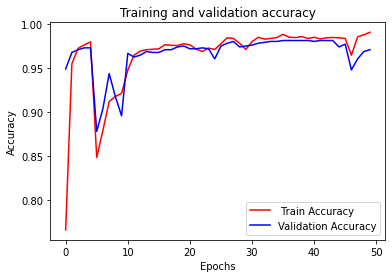

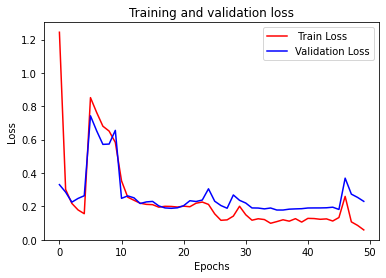

<Figure size 432x288 with 0 Axes>

Learning_rate:0.0001
Dim:425
Epoch 1/50
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
120/120 - 6s - loss: 3.5633 - accuracy: 0.1672 - val_loss: 2.5442 - val_accuracy: 0.2367
Epoch 2/50
120/120 - 2s - loss: 2.2831 - accuracy: 0.2580 - val_loss: 2.0089 - val_accuracy: 0.3650
Epoch 3/50
120/120 - 2s - loss: 1.8826 - accuracy: 0.3814 - val_loss: 1.8087 - val_accuracy: 0.3764
Epoch 4/50
120/120 - 2s - loss: 1.6936 - accuracy: 0.3783 - val_loss: 1.7680 - val_accuracy: 0.3806
Epoch 5/50
120/120 - 2s - loss: 1.6825 - accuracy: 0.3754 - val_loss: 1.7480 - val_accuracy: 0.3931
Epoch 6/50
120/120 - 2s - loss: 1.5992 - accuracy: 0.3577 - val_loss: 1.8264 - val_accuracy: 0.3264
Epoch 7/50
120/120 - 2s - loss: 1.5626 - accuracy: 0.3037 - val_loss: 1.8392 - val_accuracy: 0.2868
Epoch 8/50
120/120 - 2s - loss: 1.5924 - accuracy: 0.3277 - val_loss: 1.8137 - val_accuracy: 0.3034
Epoch 

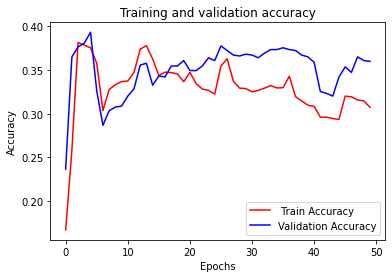

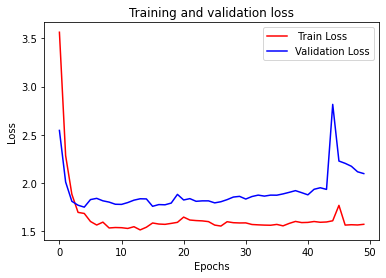

<Figure size 432x288 with 0 Axes>

Learning_rate:0.0001
Dim:212
Epoch 1/50
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
120/120 - 6s - loss: 2.4725 - accuracy: 0.1915 - val_loss: 2.2982 - val_accuracy: 0.2179
Epoch 2/50
120/120 - 2s - loss: 2.0685 - accuracy: 0.2168 - val_loss: 2.1537 - val_accuracy: 0.2158
Epoch 3/50
120/120 - 2s - loss: 2.0330 - accuracy: 0.2009 - val_loss: 2.1379 - val_accuracy: 0.2148
Epoch 4/50
120/120 - 2s - loss: 2.0573 - accuracy: 0.1905 - val_loss: 2.1951 - val_accuracy: 0.2086
Epoch 5/50
120/120 - 2s - loss: 2.0202 - accuracy: 0.1876 - val_loss: 2.1257 - val_accuracy: 0.2075
Epoch 6/50
120/120 - 2s - loss: 1.9256 - accuracy: 0.1837 - val_loss: 2.1230 - val_accuracy: 0.1919
Epoch 7/50
120/120 - 2s - loss: 1.8673 - accuracy: 0.1758 - val_loss: 2.1156 - val_accuracy: 0.1908
Epoch 8/50
120/120 - 2s - loss: 1.8327 - accuracy: 0.1761 - val_loss: 2.1115 - val_accuracy: 0.1877
Epoch 

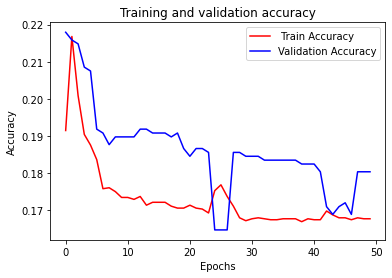

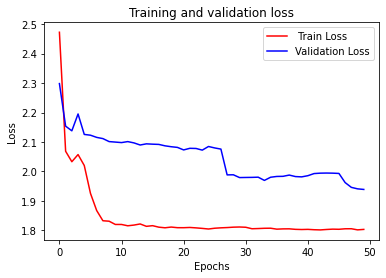

<Figure size 432x288 with 0 Axes>

Learning_rate:1e-05
Dim:21290
Epoch 1/50
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
120/120 - 11s - loss: 0.8961 - accuracy: 0.8636 - val_loss: 0.2273 - val_accuracy: 0.9708
Epoch 2/50
120/120 - 8s - loss: 0.1167 - accuracy: 0.9843 - val_loss: 0.1742 - val_accuracy: 0.9781
Epoch 3/50
120/120 - 8s - loss: 0.1131 - accuracy: 0.9862 - val_loss: 0.1849 - val_accuracy: 0.9812
Epoch 4/50
120/120 - 8s - loss: 0.1279 - accuracy: 0.9849 - val_loss: 0.2296 - val_accuracy: 0.9708
Epoch 5/50
120/120 - 8s - loss: 0.0919 - accuracy: 0.9885 - val_loss: 0.1141 - val_accuracy: 0.9854
Epoch 6/50
120/120 - 8s - loss: 0.0581 - accuracy: 0.9914 - val_loss: 0.1410 - val_accuracy: 0.9823
Epoch 7/50
120/120 - 8s - loss: 0.1826 - accuracy: 0.9716 - val_loss: 0.1300 - val_accuracy: 0.9823
Epoch 8/50
120/120 - 8s - loss: 0.0687 - accuracy: 0.9919 - val_loss: 0.1092 - val_accuracy: 0.9833
Epoc

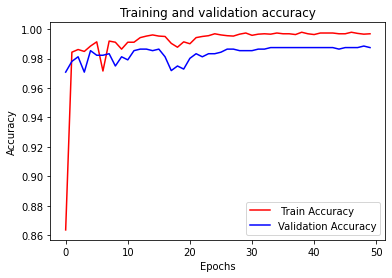

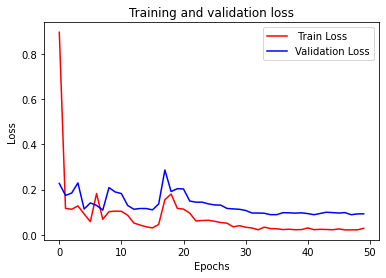

<Figure size 432x288 with 0 Axes>

Learning_rate:1e-05
Dim:2129
Epoch 1/50
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
120/120 - 6s - loss: 5.1436 - accuracy: 0.2113 - val_loss: 3.6842 - val_accuracy: 0.3295
Epoch 2/50
120/120 - 2s - loss: 3.6550 - accuracy: 0.3822 - val_loss: 3.3021 - val_accuracy: 0.4953
Epoch 3/50
120/120 - 2s - loss: 3.2595 - accuracy: 0.5333 - val_loss: 3.0573 - val_accuracy: 0.6350
Epoch 4/50
120/120 - 2s - loss: 2.9649 - accuracy: 0.6334 - val_loss: 2.8954 - val_accuracy: 0.6955
Epoch 5/50
120/120 - 2s - loss: 2.6886 - accuracy: 0.6770 - val_loss: 2.6465 - val_accuracy: 0.7164
Epoch 6/50
120/120 - 3s - loss: 2.3585 - accuracy: 0.7002 - val_loss: 2.3355 - val_accuracy: 0.7237
Epoch 7/50
120/120 - 2s - loss: 2.1230 - accuracy: 0.7235 - val_loss: 2.0772 - val_accuracy: 0.7299
Epoch 8/50
120/120 - 2s - loss: 1.7511 - accuracy: 0.7365 - val_loss: 1.8326 - val_accuracy: 0.7404
Epoch 

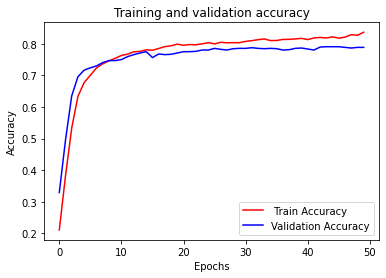

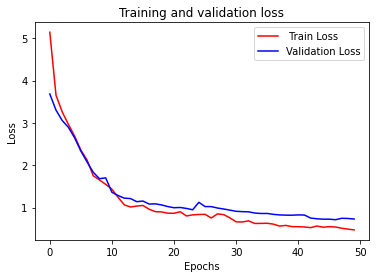

<Figure size 432x288 with 0 Axes>

Learning_rate:1e-05
Dim:425
Epoch 1/50
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
120/120 - 6s - loss: 6.3893 - accuracy: 0.1524 - val_loss: 6.3743 - val_accuracy: 0.1481
Epoch 2/50
120/120 - 2s - loss: 6.1567 - accuracy: 0.1508 - val_loss: 6.1786 - val_accuracy: 0.1502
Epoch 3/50
120/120 - 2s - loss: 6.0315 - accuracy: 0.1511 - val_loss: 6.0736 - val_accuracy: 0.1522
Epoch 4/50
120/120 - 2s - loss: 5.8836 - accuracy: 0.1539 - val_loss: 5.9205 - val_accuracy: 0.1533
Epoch 5/50
120/120 - 2s - loss: 5.5921 - accuracy: 0.1508 - val_loss: 5.7254 - val_accuracy: 0.1543
Epoch 6/50
120/120 - 2s - loss: 5.3044 - accuracy: 0.1524 - val_loss: 5.5582 - val_accuracy: 0.1616
Epoch 7/50
120/120 - 2s - loss: 5.0851 - accuracy: 0.1620 - val_loss: 5.4259 - val_accuracy: 0.1585
Epoch 8/50
120/120 - 2s - loss: 4.9366 - accuracy: 0.1568 - val_loss: 5.2630 - val_accuracy: 0.1595
Epoch 9

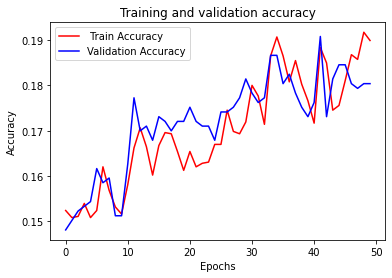

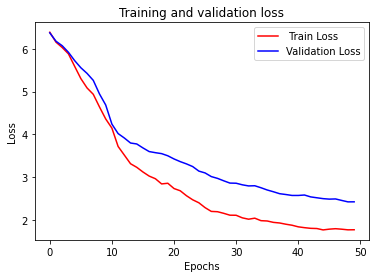

<Figure size 432x288 with 0 Axes>

Learning_rate:1e-05
Dim:212
Epoch 1/50
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
120/120 - 6s - loss: 4.5542 - accuracy: 0.2395 - val_loss: 4.7384 - val_accuracy: 0.2430
Epoch 2/50
120/120 - 2s - loss: 4.3013 - accuracy: 0.2481 - val_loss: 4.6281 - val_accuracy: 0.2482
Epoch 3/50
120/120 - 2s - loss: 4.1508 - accuracy: 0.2505 - val_loss: 4.4515 - val_accuracy: 0.2482
Epoch 4/50
120/120 - 2s - loss: 3.9495 - accuracy: 0.2575 - val_loss: 4.3526 - val_accuracy: 0.2471
Epoch 5/50
120/120 - 2s - loss: 3.7826 - accuracy: 0.2578 - val_loss: 4.3527 - val_accuracy: 0.2440
Epoch 6/50
120/120 - 2s - loss: 3.7524 - accuracy: 0.2557 - val_loss: 4.3006 - val_accuracy: 0.2450
Epoch 7/50
120/120 - 2s - loss: 3.6842 - accuracy: 0.2606 - val_loss: 4.2335 - val_accuracy: 0.2450
Epoch 8/50
120/120 - 2s - loss: 3.6500 - accuracy: 0.2572 - val_loss: 4.1747 - val_accuracy: 0.2471
Epoch 9

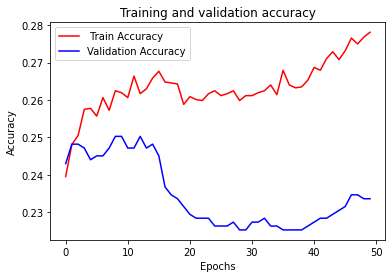

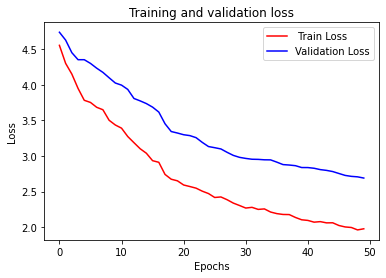

<Figure size 432x288 with 0 Axes>

In [ ]:
acc_t=[]
losses_t=[]
acc_v=[]
losses_val=[]
indicator_column_names = data.columns.drop('label')
batch_size=32
num_nodes=[1000,290,60,20]
learning_rate=[10e-4,10e-5,10e-6]
num_epochs = 50

for lr in learning_rate:
  for n,dim in enumerate(embedding_dims):
    categorical_column=[]
    embedding_column=[]
    feature_columns=[]
    for i,col_name in enumerate(indicator_column_names):
      categorical_column = feature_column.categorical_column_with_vocabulary_list(col_name, data[col_name].unique())
      #print(len(data[col_name].unique()))
      embedding_colum = feature_column.embedding_column(categorical_column, dimension=dim[i])
      feature_columns.append(embedding_colum)
    
    feature_layer = tf.keras.layers.DenseFeatures(feature_columns)
    
    #example_batch = next(iter(train_ds))[0]
    print('Learning_rate:'+str(lr))
    print('Dim:'+str(dim[0]))
    model = tf.keras.Sequential([                          
     feature_layer,
    layers.Dense(num_nodes[n], activation='relu'),
    layers.Dense(int(num_nodes[n]/10), activation='relu'),
    layers.Dropout(.1),
    layers.Dense(6)

    ])
    

    bs = 32
    opt = tf.keras.optimizers.Adam(learning_rate=lr)
    #train_ds = df_to_dataset(train_x,train_y,batch_size = bs)
    #val_ds = df_to_dataset(val_x,val_y,batch_size = bs)


    model.compile(optimizer=opt,
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                  metrics=['accuracy'])

    history = model.fit(train_ds, epochs=num_epochs, validation_data=val_ds, batch_size =batch_size, verbose=2)


    import matplotlib.image  as mpimg
    import matplotlib.pyplot as plt
    
    #Result Visulization
    print('lr='+str(lr)+'dims:'+str(dim[0]))
    
    acc=history.history['accuracy']
    acc_t.append(acc)
    val_acc=history.history['val_accuracy']
    acc_v.append(val_acc)
    loss=history.history['loss']
    losses_t.append(loss)
    val_loss=history.history['val_loss']
    losses_val.append(val_loss)

    epochs=range(len(acc)) # Get number of epochs


    # Plot training and validation accuracy per epoch

    plt.plot(epochs, acc, 'r')
    plt.plot(epochs, val_acc, 'b')
    plt.title('Training and validation accuracy')
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend([" Train Accuracy", "Validation Accuracy"])

    plt.figure()


    # Plot training and validation loss per epoch

    plt.plot(epochs, loss, 'r')
    plt.plot(epochs, val_loss, 'b')
    plt.title('Training and validation loss')
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend([" Train Loss", "Validation Loss"])

    plt.figure()
    plt.show()

In [ ]:
lr=0.0001
dims=embedding_dims[1]
num_epoch=100

categorical_column=[]
embedding_column=[]
feature_columns=[]
for i,col_name in enumerate(indicator_column_names):
  categorical_column = feature_column.categorical_column_with_vocabulary_list(col_name, data[col_name].unique())
  #print(len(data[col_name].unique()))
  embedding_colum = feature_column.embedding_column(categorical_column, dimension=dims[i])
  feature_columns.append(embedding_colum)

feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

#example_batch = next(iter(train_ds))[0]
print('Learning_rate:'+str(lr))
print('Dim:'+str(dims[0]))
model = tf.keras.Sequential([                          
  feature_layer,
layers.Dense(256, activation='relu'),
layers.Dense(256, activation='relu'),
#layers.Dense(128, activation='relu'),
layers.Dropout(.1),
layers.Dense(6)

])


bs = 32
opt = tf.keras.optimizers.Adam(learning_rate=lr)
#train_ds = df_to_dataset(train_x,train_y,batch_size = bs)
#val_ds = df_to_dataset(val_x,val_y,batch_size = bs)


model.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

history = model.fit(train_ds, epochs=num_epoch, validation_data=val_ds, batch_size =batch_size, verbose=2)




Learning_rate:0.0001
Dim:2129
Epoch 1/100
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
120/120 - 6s - loss: 2.1468 - accuracy: 0.6199 - val_loss: 0.7779 - val_accuracy: 0.8822
Epoch 2/100
120/120 - 3s - loss: 0.5027 - accuracy: 0.9348 - val_loss: 0.6541 - val_accuracy: 0.9218
Epoch 3/100
120/120 - 3s - loss: 0.3552 - accuracy: 0.9559 - val_loss: 0.5436 - val_accuracy: 0.9374
Epoch 4/100
120/120 - 3s - loss: 0.3482 - accuracy: 0.9570 - val_loss: 0.5886 - val_accuracy: 0.9312
Epoch 5/100
120/120 - 3s - loss: 0.3458 - accuracy: 0.9577 - val_loss: 0.4745 - val_accuracy: 0.9489
Epoch 6/100
120/120 - 3s - loss: 0.2592 - accuracy: 0.9776 - val_loss: 0.4352 - val_accuracy: 0.9520
Epoch 7/100
120/120 - 2s - loss: 0.2259 - accuracy: 0.9815 - val_loss: 0.4659 - val_accuracy: 0.9531
Epoch 8/100
120/120 - 3s - loss: 0.2330 - accuracy: 0.9828 - val_loss: 0.4555 - val_accuracy: 0.95

IndexError: ignored

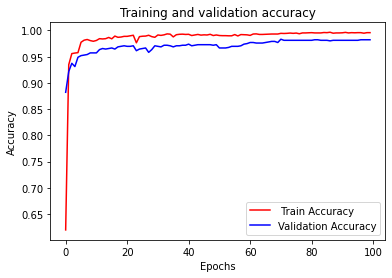

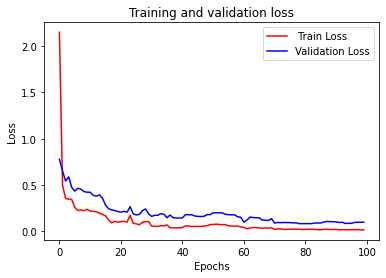

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#Result Visulization
#print('lr='+str(lr)+'dims:'+str(dim[0]))

acc=history.history['accuracy']

val_acc=history.history['val_accuracy']

loss=history.history['loss']

val_loss=history.history['val_loss']


epochs=range(len(acc)) # Get number of epochs


# Plot training and validation accuracy per epoch

plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend([" Train Accuracy", "Validation Accuracy"])

plt.figure()


# Plot training and validation loss per epoch

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend([" Train Loss", "Validation Loss"])

plt.figure()
plt.show()

In [ ]:
#Test the model
loss, accuracy = model.evaluate(test_ds)
print("Accuracy", accuracy)

38/38 [==============================] - 1s 13ms/step - loss: 0.0760 - accuracy: 0.9883
Accuracy 0.9883236289024353
